## **Importing Libraries**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


## **Read dataset**

In [53]:
df= pd.read_csv('/content/Mall_Customers 2.csv') #loads the csv file into a pandas dataframe
df.head() #returns the first 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [60]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## **Visualization**

In [61]:
plt.figure(1, figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

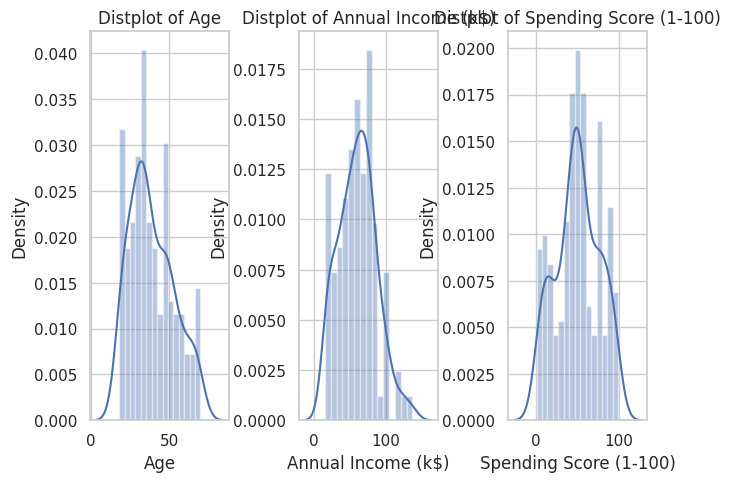

In [62]:
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=15)
    plt.title('Distplot of {}'.format(x))
plt.show()

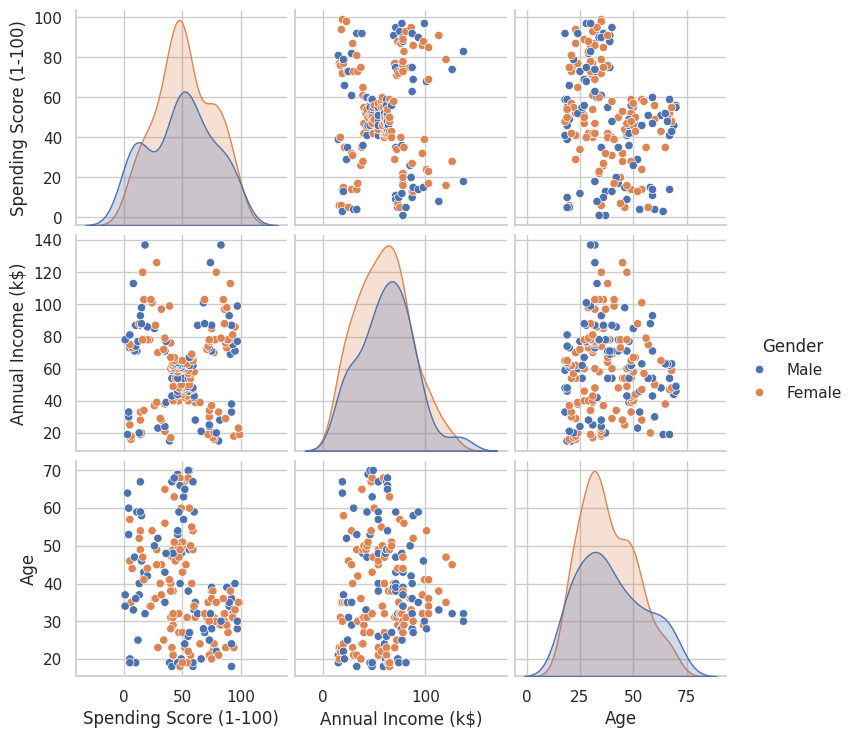

In [63]:
sns.pairplot(df, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue="Gender")

## **2D Clustering based on Age and Spending**

In [64]:

X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 15):
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan'
    )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

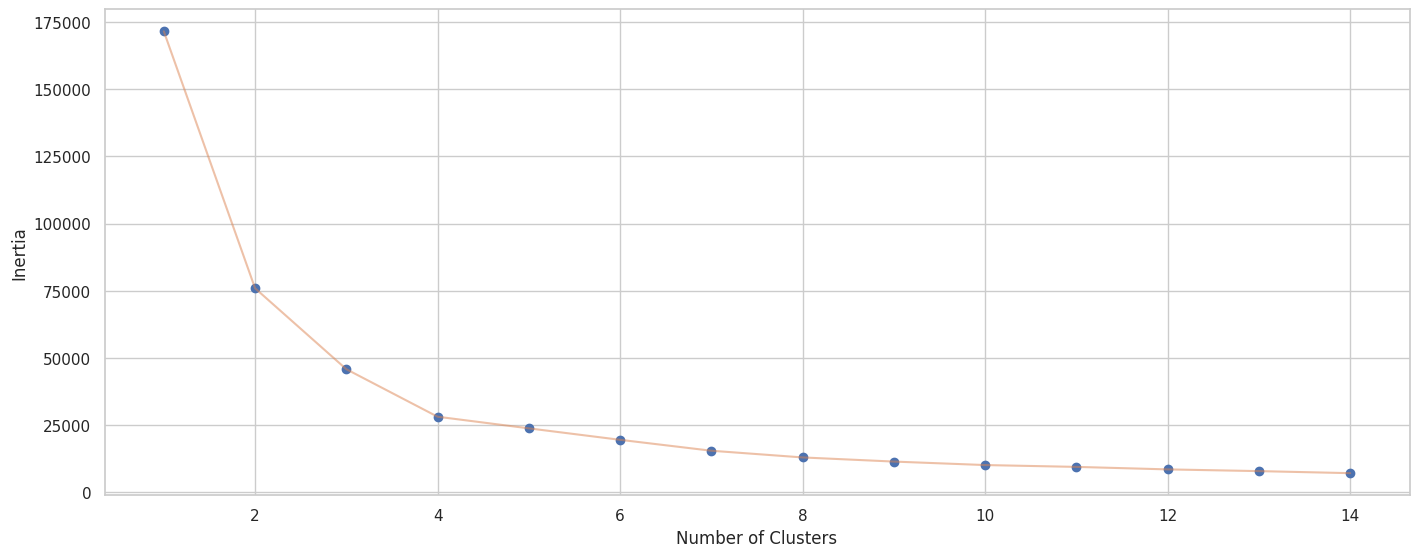

In [65]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

## **Applying KMeans for k=4**

In [66]:
algorithm = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

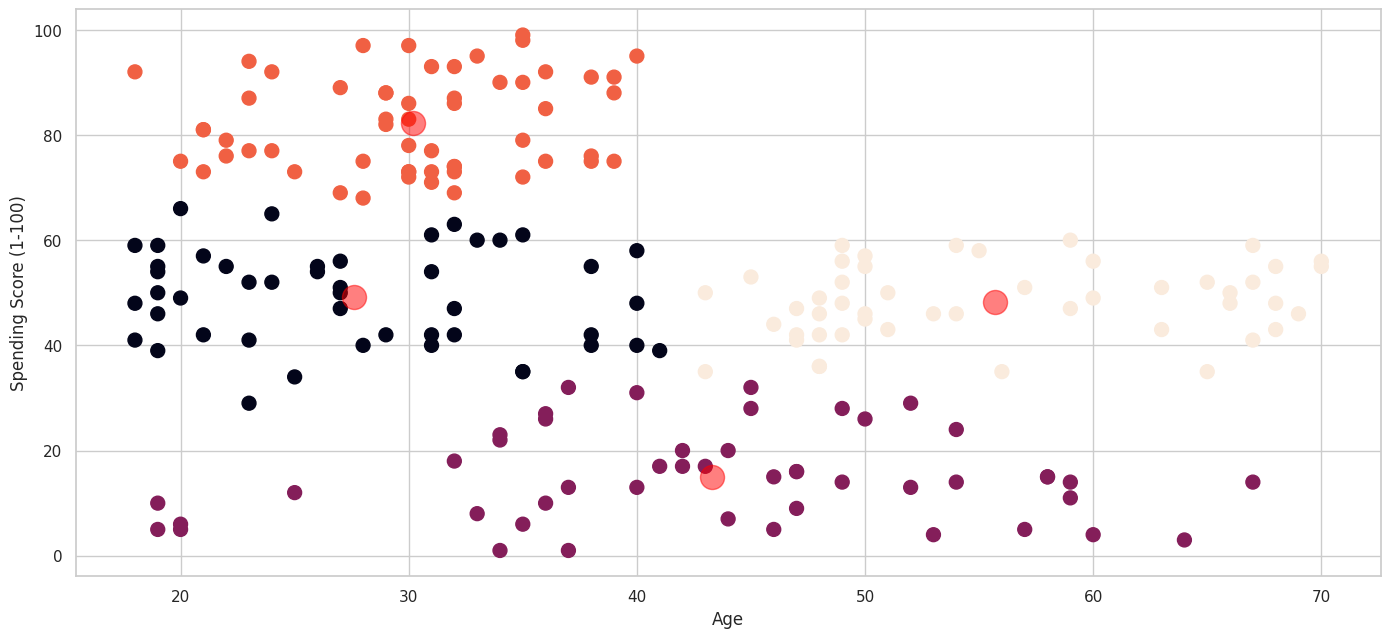

In [67]:
plt.figure(1, figsize=(15, 7))
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=100)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()